In [47]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [48]:
# Load MNIST data from data_loaders
# from data_loader.data_loaders import SyMNISTDataLoader
from data_loader.data_loaders import UnnormalSyMNISTDataLoader

In [49]:
# Load a datapoint from the dataset
data_loader = UnnormalSyMNISTDataLoader('data/',512)
sample = data_loader.dataset.images.data
print(sample.shape)


(0, 0, 0, 1, 0)
torch.Size([60000, 1, 28, 28])


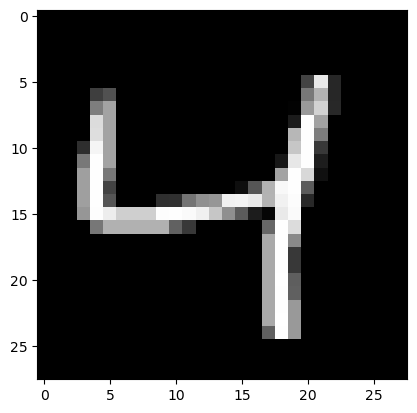

In [50]:
plt.imshow(sample[2,0], cmap='gray')

In [45]:
def sct(image, b=[0,0], r=1.0):
    # Get the size of the image
    N = image.shape[0]
    M = image.shape[1]
    # Create a meshgrid
    x = np.linspace(-1,1,N)
    y = np.linspace(-1,1,M)
    X,Y = np.meshgrid(x,y)

    # For each point in the meshgrid, invert by dividing by 
    # the norm squared:
    sq_norm = (X**2 + Y**2)
    X_inv = r**2*X/sq_norm
    Y_inv = r**2*Y/sq_norm
    # Subtract vector b to the inversion coordinates
    X_inv_b = X_inv - b[0]
    Y_inv_b = Y_inv - b[1]

    X_inv_bp = X_inv + b[0]
    Y_inv_bp = Y_inv_b

    X_inv_bp_inv = X_inv_b
    Y_inv_bp_inv = Y_inv + b[1]
    # Invert again:
    sq_norm = (X_inv_b**2 + Y_inv_b**2)
    X_new = r**2*X_inv_b/sq_norm
    Y_new = r**2*Y_inv_b/sq_norm

    sqp_norm = (X_inv_bp**2 + Y_inv_bp**2)
    Xp_new = r**2*X_inv_bp/sqp_norm
    Yp_new = r**2*Y_inv_bp/sqp_norm

    sqp_norm = (X_inv_bp_inv**2 + Y_inv_bp_inv**2)
    Xp_inv = r**2*X_inv_bp_inv/sqp_norm
    Yp_inv = r**2*Y_inv_bp_inv/sqp_norm

    return X, Y, X_new, Y_new, Xp_new, Yp_new, Xp_inv, Yp_inv


def Transform(image, b=[0,0], r=1.0, plot=False):
    """ This function applied a special conformal transformation to an image."""
    # Get coordinates of transformed grid
    X, Y, X_new, Y_new, Xp_new, Yp_new, Xp_inv, Yp_inv = sct(image, b, r)
    image_flip = torch.flip(image, dims=[0])
    original_coords = torch.stack([torch.tensor(X),torch.tensor(Y)],dim=-1)

    # Plot the above again but side by side but crop the second image
    # to a range of [-1, 1]:
    if plot:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.scatter(X, Y, c=image_flip)
        plt.axis("equal")
        plt.title("Original")
        plt.subplot(1,2,2)
        plt.scatter(X_new, Y_new, c=image_flip)

        plt.axis("equal")
        plt.title("Transformed")
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.show()

    new_coords = torch.stack([torch.tensor(Xp_new),torch.tensor(Yp_new)],
                             dim=-1).reshape(*original_coords.shape)
    new_coords = new_coords.to(torch.float32)
    new_image = torch.nn.functional.grid_sample(image[None, None, ...], new_coords[None, ...], mode='bilinear', padding_mode='zeros')

    inv_coords = torch.stack([torch.tensor(Xp_inv),torch.tensor(Yp_inv)],
                             dim=-1).reshape(*original_coords.shape)
    inv_coords = inv_coords.to(torch.float32)
    image_recon = torch.nn.functional.grid_sample(new_image, inv_coords[None, ...], mode='bilinear', padding_mode='zeros')

    # Calculate the MSE between the original and the reconstructed image
    # and plot the residual:
    residual = image - image_recon[0,0]
    mse = torch.mean(residual**2)
    mse = mse.numpy()
    # print("MSE: ", mse)

    if plot:
        plt.figure(figsize=(8,5))
        plt.subplot(1,3,1)
        plt.imshow(image, cmap='gray')
        plt.title("Original")
        plt.axis("off")
        plt.subplot(1,3,2)
        plt.imshow(new_image[0,0], cmap='gray')
        plt.title("Transformed")
        plt.axis("off")
        plt.subplot(1,3,3)
        plt.imshow(image_recon[0,0], cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
        plt.show()

    return new_image, mse

torch.Size([28, 28])


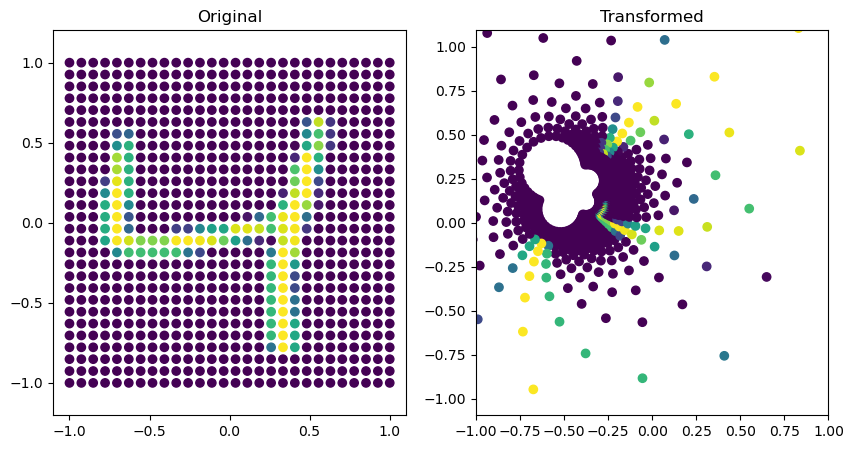

/home/alex/anaconda3/envs/fourier_clone/lib/python3.8/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


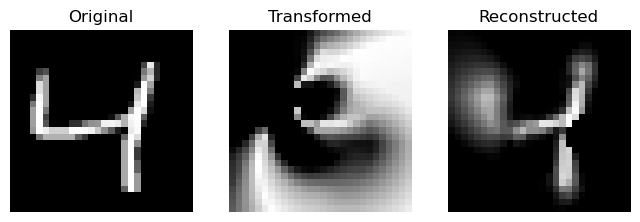

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([2

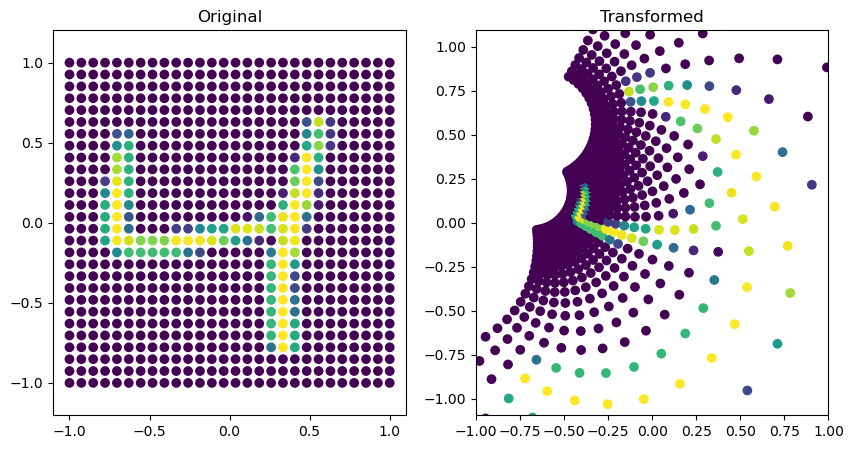

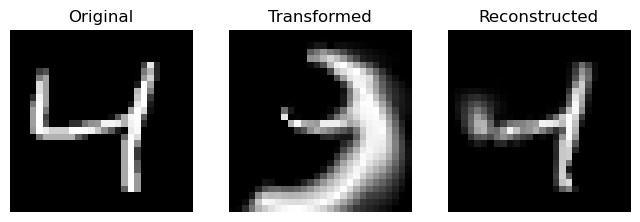

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([2

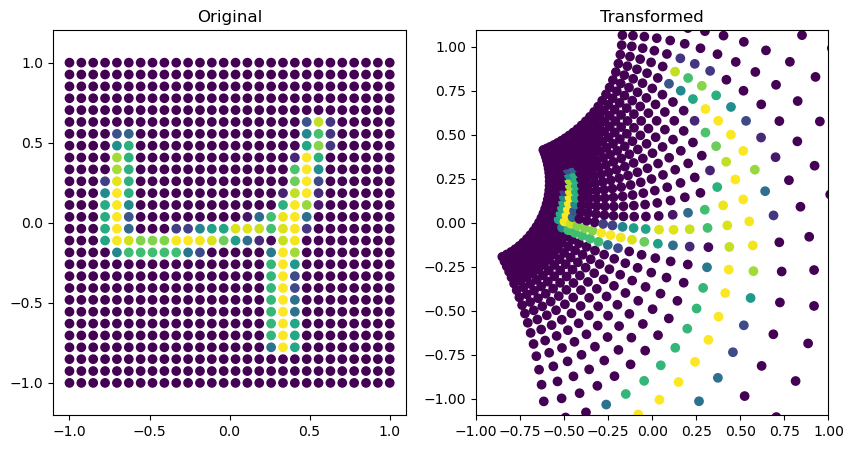

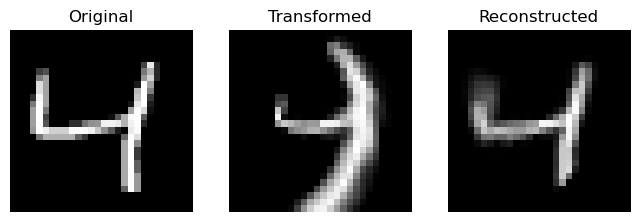

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([2

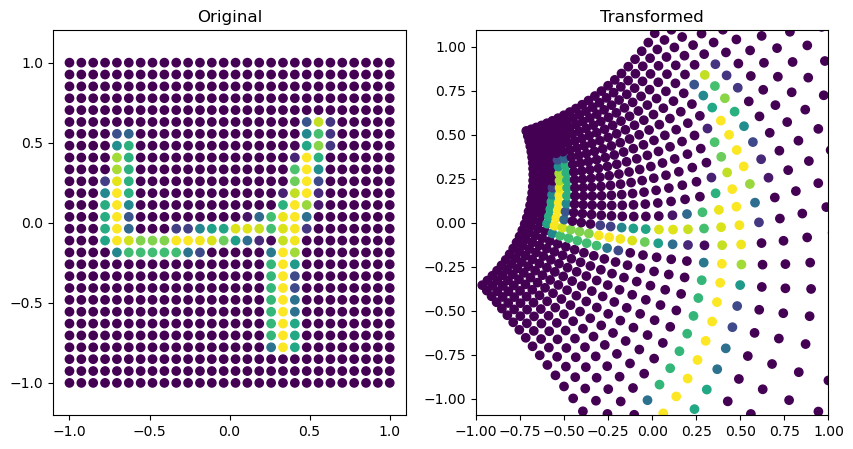

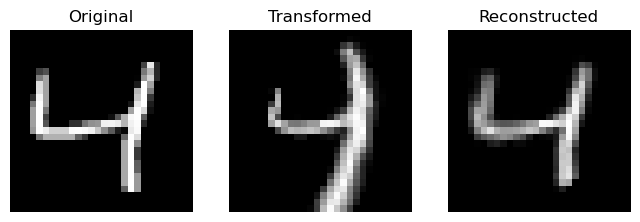

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([2

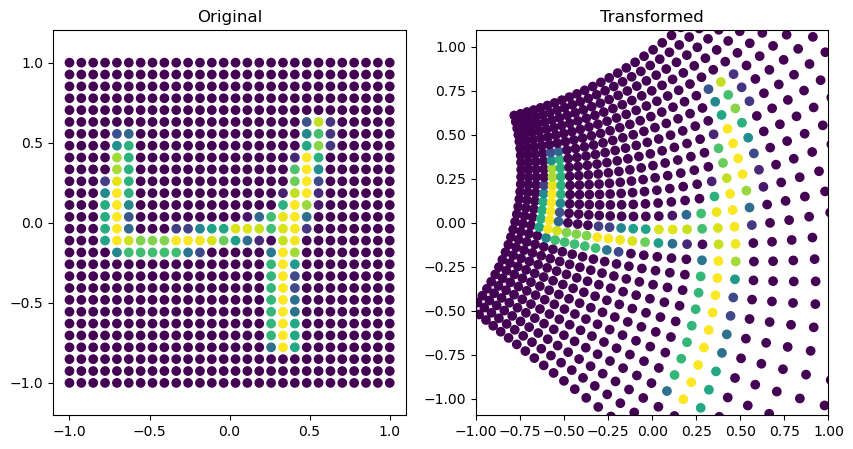

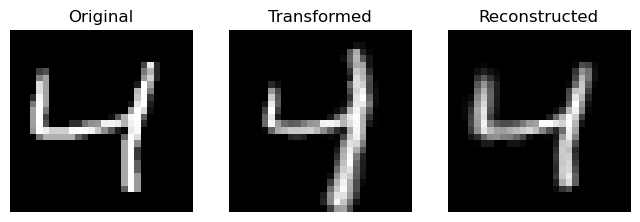

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([2

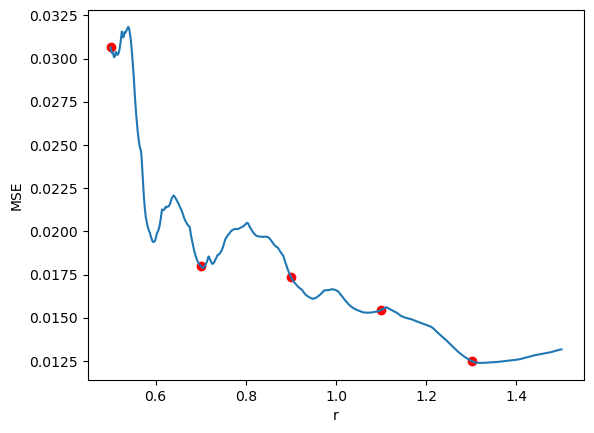

In [51]:
def plot_sct_range(b, r_min, r_max, num_points=5000): 
   # Apply SCT for different values of r, store them and plot them:
    mse_list = []
    min = r_min
    max = r_max
    i = 0
    trigger_plot = num_points//5
    plot_radii = {}
    for radius in np.linspace(min, max, num_points):
        if i % trigger_plot == 0:
            plot_image = True
        else:
            plot_image = False
        print(sample[2,0].shape)
        _, mse = Transform(sample[2,0], b, r=radius, plot=plot_image)
        mse_list.append(mse)
        
        if plot_image:
            plot_radii[radius] = mse
        i += 1

    plt.plot(np.linspace(min, max, num_points), mse_list)
    # At plot_radii, we have the MSE for each radius, plot these
    # points in red:
    for radius, mse in plot_radii.items():
        plt.scatter(radius, mse, c='red')
    plt.xlabel("r")
    plt.ylabel("MSE")
    plt.show()
    return None

plot_sct_range([0.5,-0.2], 0.5, 1.5, num_points=1000)